<a href="https://colab.research.google.com/github/Himalaypatel75/ML-Hello-World/blob/main/Machine_Learning_FCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv("magic04.data", names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [4]:
df["class"] = (df["class"] == "g").astype(int)

In [5]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


4.2835
334.177


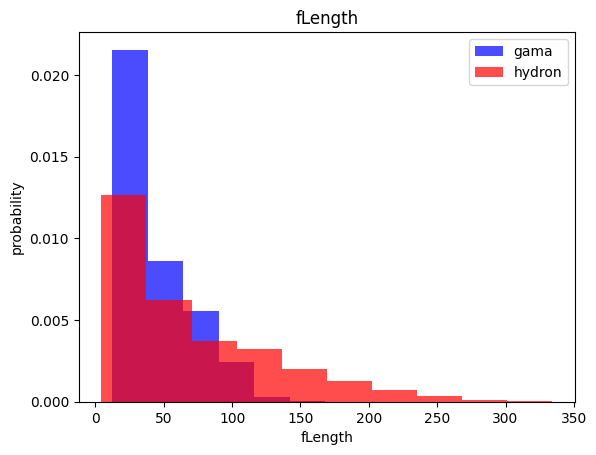

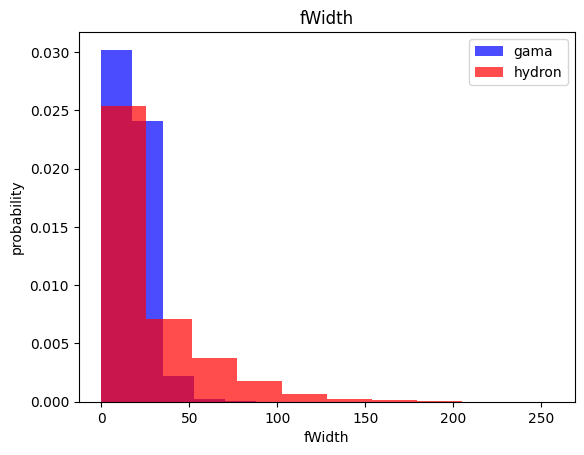

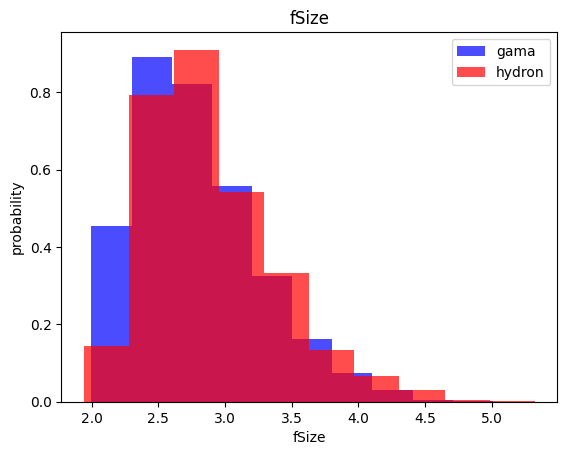

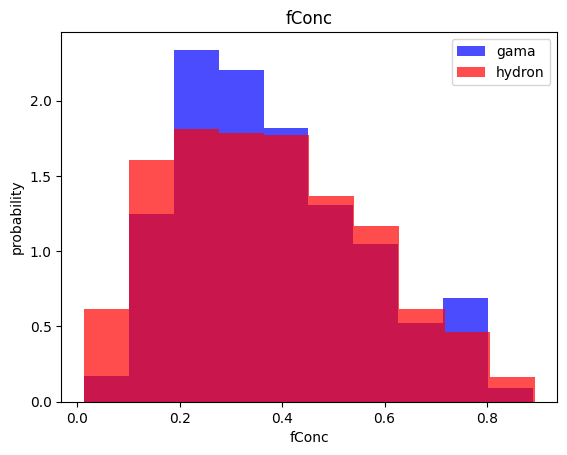

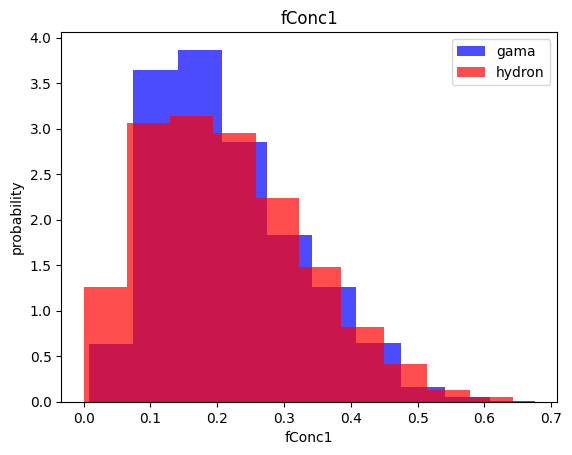

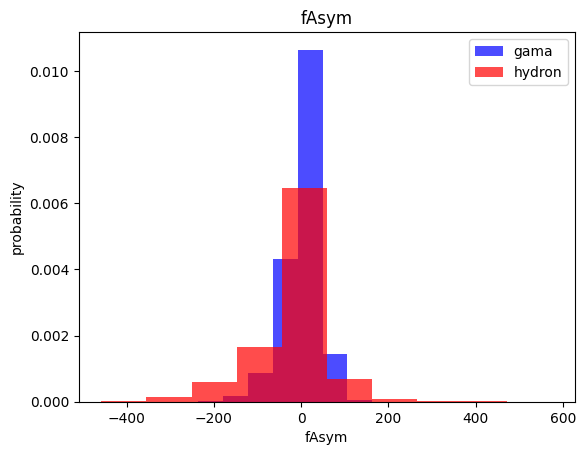

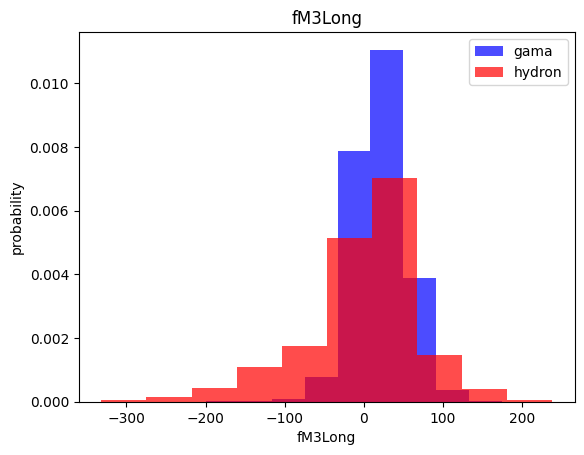

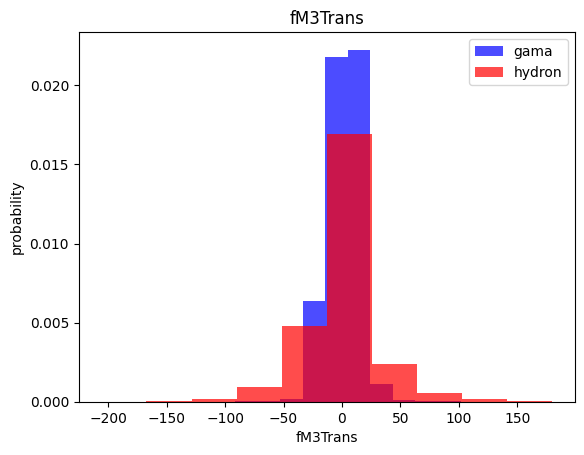

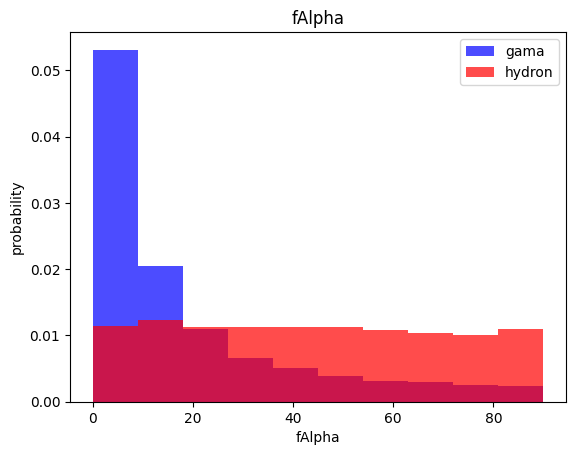

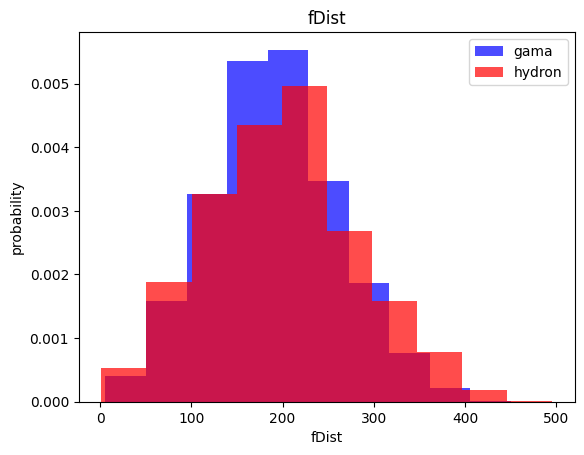

In [6]:
print(df["fLength"].min())
print(df["fLength"].max())

for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color='blue', label='gama', alpha=0.7, density = True)
  plt.hist(df[df["class"] == 0][label], color='red', label='hydron', alpha=0.7, density = True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [7]:
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))]) #split data for testing and validation.

In [8]:
def scane_dataset(dataframe, oversample = False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values


    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
      ros = RandomOverSampler()
      x, y = ros.fit_resample(x , y)


    data = np.hstack((x, np.reshape(y, (-1,1))))

    return data, x, y



---


np.reshape(y, (-1,1)), "-yy") in this it will change shape of np. to match hstack operation


---

In NumPy, the np.hstack function is used to stack arrays in a horizontal sequence.


---




In [9]:
train, x_train, y_train = scane_dataset(train, True)
valid, x_valid, y_valid = scane_dataset(valid, False)
test, x_test, y_test = scane_dataset(test, False)

K-nearest neighbours - model

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred = knn_model.predict(x_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1363
           1       0.85      0.84      0.85      2441

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bayes ( conditional probability and bayes roule -> https://www.youtube.com/watch?v=7zpEuCTcdKk&ab_channel=KrishNaikHindi)



In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [16]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.39      0.50      1363
           1       0.73      0.90      0.80      2441

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.71      0.72      0.69      3804



`Logistic Regression` (https://www.youtube.com/watch?v=_nvQKN8L1ZE&ab_channel=KrishNaikHindi)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lo_model = LogisticRegression()
lo_model = lo_model.fit(x_train, y_train)

In [19]:
y_pred = lo_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1363
           1       0.84      0.81      0.82      2441

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804





```
Support Vector Machines (SVM)
```



In [20]:
from sklearn.svm import SVC

In [21]:
svc_model = SVC()
svc_model = svc_model.fit(x_train, y_train)

In [22]:
y_pred = svc_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1363
           1       0.88      0.89      0.88      2441

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



#Neural Net

In [24]:
import tensorflow as tf